In [17]:
import pandas as pd

In [18]:
no_metro = pd.read_csv('../Data/clean-metro-sales-aux-exc.csv', low_memory = False)

In [3]:
no_metro.columns

Index(['funding_status', 'school_charter', 'school_magnet', 'school_kipp',
       'school_nlns', 'school_year_round', 'school_charter_ready_promise',
       'teacher_prefix', 'teacher_teach_for_america',
       'teacher_ny_teaching_fellow', 'primary_focus_subject',
       'primary_focus_area', 'resource_type', 'poverty_level', 'grade_level',
       'total_price_excluding_optional_support',
       'total_price_including_optional_support', 'students_reached',
       'total_donations', 'num_donors', 'eligible_double_your_impact_match',
       'eligible_almost_home_match'],
      dtype='object')

In [19]:
no_metro = no_metro[['funding_status', 'school_charter', 'school_magnet', 'primary_focus_subject', 'primary_focus_area', 'resource_type', 'poverty_level', 'grade_level', 'total_price_excluding_optional_support', 'total_price_including_optional_support', 'students_reached', 'eligible_double_your_impact_match', 'eligible_almost_home_match']]

In [20]:
X = no_metro.drop('funding_status', axis=1)
y = no_metro['funding_status']

In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, stratify=y)

In [ ]:
#K Nearest Neighbors
from sklearn.neighbors import KNeighborsClassifier

#To assign KNN, we loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []

for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score}/{test_score}')
  

k: 1, Train/Test Score: 0.996266211731888/0.620255830607001
k: 3, Train/Test Score: 0.8103654455505788/0.649991575281877
k: 5, Train/Test Score: 0.7701783700042591/0.666012580912397
k: 7, Train/Test Score: 0.7523823230692184/0.6752938120445386
k: 9, Train/Test Score: 0.742260960324258/0.6821704882124152
k: 11, Train/Test Score: 0.7364397141212317/0.6866882433058594
k: 13, Train/Test Score: 0.7320214175056282/0.6895631783653239
k: 15, Train/Test Score: 0.728740457836626/0.692750530055182


In [ ]:
for k in range(21, 40, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score}/{test_score}')
  

In [ ]:
for k in range(41, 60, 2):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f'k: {k}, Train/Test Score: {train_score}/{test_score}')
  

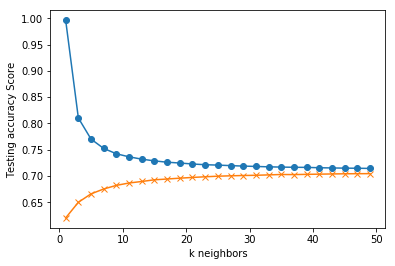

In [17]:
import matplotlib.pyplot as plt

#You can also plot it if you want to have a look at it
plt.plot(range(1, 50, 2), train_scores, marker='o')
plt.plot(range(1, 50, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [11]:
#We predict using the value of k where train and test converge
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=47)
knn.fit(X_train, y_train)
print('k=47 Test Acc: %.3f' % knn.score(X_test, y_test))

k=9 Test Acc: 0.704


In [12]:
predicted = knn.predict(X_test)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, predicted)

array([[ 14295,  71358],
       [ 12857, 186366]], dtype=int64)

[[ 14295  71358]
 [ 12857 186366]]


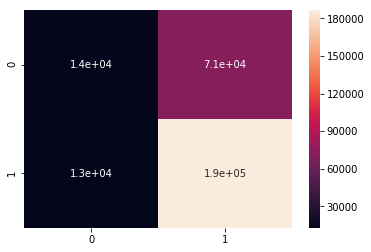

In [16]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
cm = confusion_matrix(y_test,predicted)
print(cm)
sns.heatmap(cm, annot=True)
plt.show()

In [14]:
#Predict a value
predicted = knn.predict(X_test)

from sklearn.metrics import roc_auc_score
rocauc = roc_auc_score(y_test, predicted)

from sklearn.metrics import average_precision_score

average_precision = average_precision_score(y_test, predicted)


from sklearn.metrics import log_loss
from math import exp

lol = log_loss(y_test, predicted)

print(rocauc, average_precision, exp(lol))

0.5511793040841959 0.7215871007623087 27188.46657652323
